In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
!pip install xgboost


     |████████████████████████████████| 297.1 MB 2.6 kB/s  eta 0:00:01   |████                            | 36.6 MB 8.4 MB/s eta 0:00:31     |█████▍                          | 49.7 MB 25.5 MB/s eta 0:00:10     |█████████████████▎              | 160.3 MB 37.3 MB/s eta 0:00:04     |██████████████████████████▏     | 243.0 MB 66.6 MB/s eta 0:00:01     |█████████████████████████████   | 268.6 MB 19.9 MB/s eta 0:00:02     |███████████████████████████████ | 287.2 MB 30.4 MB/s eta 0:00:01


In [8]:
!conda install -c conda-forge xgboost


/bin/bash: conda: command not found


In [9]:
import xgboost as xgb


In [12]:
df=pd.read_csv("/home/kartik/Downloads/archive/uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [15]:
df1=df[df['pickup_longitude']!=0]
df1=df1[df1['pickup_latitude']!=0]
df1=df1[df1['dropoff_longitude']!=0]
df1=df1[df1['dropoff_latitude']!=0]
df1=df1[df1['passenger_count']!=0]
df1.reset_index(inplace=True)
df1.drop(['index','key'], axis=1, inplace=True)
df1.rename(columns={"Unnamed: 0": "trip"}, inplace=True)

In [17]:
df1.head()


,trip,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [18]:
df1[(abs(df1['pickup_latitude'])>90)|(abs(df1['dropoff_latitude'])>90)|(abs(df1['dropoff_longitude'])>180)|(abs(df1['pickup_longitude'])>180)].head(10)


,trip,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
4852,42931506,4.9,2012-04-28 00:58:00 UTC,-748.016667,40.739957,-74.003570,40.734192,1
31808,5634081,15.7,2012-06-16 10:04:00 UTC,-74.016055,40.715155,-737.916665,40.697862,2
47423,1055960,33.7,2011-11-05 23:26:00 UTC,-735.200000,40.770092,-73.980187,40.765530,1
55315,14257861,8.1,2012-03-11 07:24:00 UTC,-73.960828,404.433332,-73.988357,40.769037,1
60374,2849369,8.5,2012-06-13 05:45:00 UTC,-73.951385,401.066667,-73.982110,40.754117,1
74112,33249845,15.7,2011-11-05 00:22:00 UTC,-1340.648410,1644.421482,-3356.666300,872.697628,1
89321,23566642,16.1,2011-05-18 13:24:00 UTC,57.418457,1292.016128,1153.572603,-881.985513,1
101333,16826862,12.9,2011-10-14 19:04:00 UTC,-736.216667,40.767035,-73.982377,40.725562,1
136200,39981694,13.7,2012-01-20 11:50:00 UTC,-74.011042,40.709780,-73.983163,493.533332,4
140907,9421322,7.3,2009-08-26 11:55:00 UTC,-768.550000,40.757812,-73.997040,40.740007,1


In [19]:
df1=df1[df1['pickup_latitude']<1000]
df1['pickup_longitude'][df1['pickup_longitude']<-700]=df1['pickup_longitude']/10
df1['dropoff_longitude'][df1['dropoff_longitude']<-700]=df1['dropoff_longitude']/10
df1['pickup_latitude'][df1['pickup_latitude']>400]=df1['pickup_latitude']/10
df1['dropoff_latitude'][df1['dropoff_latitude']>400]=df1['dropoff_latitude']/10


In [20]:
df1[(df1['pickup_latitude']<-70) | (df1['dropoff_latitude']<-70)].head()


,trip,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2441,6452891,6.0,2013-05-22 10:54:00 UTC,40.746760,-73.982127,40.757287,-73.974800,1
4287,44648183,12.5,2013-05-24 00:43:00 UTC,40.751797,-73.970777,40.719787,-73.992137,6
4335,3826665,9.5,2013-05-25 01:16:00 UTC,40.732897,-73.997740,40.747532,-73.972540,1
4653,52635142,6.5,2013-05-22 12:38:00 UTC,40.770667,-73.961957,40.761672,-73.967237,1
7219,45851743,10.5,2013-05-23 00:29:00 UTC,40.714897,-74.009697,40.726197,-73.994370,2


In [21]:
df1.loc[df1['pickup_latitude'] < -70, ['pickup_latitude', 'pickup_longitude']] = df1.loc[df1['pickup_latitude'] < -70, ['pickup_longitude', 'pickup_latitude']].values
df1.loc[df1['dropoff_latitude'] < -70, ['dropoff_latitude', 'dropoff_longitude']] = df1.loc[df1['dropoff_latitude'] < -70, ['dropoff_longitude', 'dropoff_latitude']].values

In [22]:
df1[abs(df1['pickup_longitude']-df1['dropoff_longitude'])>40].head()


,trip,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1900,915515,7.0,2013-02-10 16:18:00 UTC,-0.131667,40.757063,-73.991593,40.749953,1
2118,7976070,5.7,2012-07-21 12:16:00 UTC,-1.216667,40.748597,-74.004822,40.734670,1
6468,32571365,9.3,2012-06-05 19:05:00 UTC,-1.866667,40.765987,-73.972280,40.793807,1
11631,16955954,14.9,2012-02-26 00:01:00 UTC,-0.007712,40.725602,-73.967487,40.766410,5
17534,47756032,5.3,2012-02-18 11:43:00 UTC,-73.962162,40.763307,-4.933332,40.774010,1


In [23]:
df1=df1[abs(df1['pickup_longitude']-df1['dropoff_longitude'])<40]


In [24]:
df1[(abs(df1['pickup_longitude'])<1) | (abs(df1['dropoff_longitude'])<1)].head()


,trip,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
163,17269533,14.5,2010-07-14 17:38:00 UTC,0.001782,0.007380,0.000875,0.005670,1
22604,10365124,10.9,2010-10-09 22:53:00 UTC,-0.076468,0.087237,-0.079742,0.097257,1
35837,24351230,11.7,2010-06-12 11:55:00 UTC,0.013518,0.001857,0.010920,0.010308,1
36683,26069620,25.3,2011-07-13 15:32:00 UTC,0.012797,0.013382,0.038577,0.010865,1
49504,31719280,8.1,2010-11-01 18:35:00 UTC,0.009787,-0.003073,0.008988,0.005200,2


In [25]:
df1=df1[abs(df1['pickup_longitude'])>1]


In [26]:
df1[((df1['pickup_latitude']<40.52) & (df1['pickup_longitude']>-73.96)) | ((df1['dropoff_latitude']<40.52) & (df1['dropoff_longitude']>-73.96))].head()


,trip,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1862,6368561,5.0,2012-10-19 20:24:00 UTC,-73.733760,40.221474,-73.737622,40.223950,1
2613,53340226,6.9,2011-06-03 00:03:00 UTC,-73.902908,40.428030,-73.931997,40.422658,1
3064,12380843,11.0,2012-11-07 16:30:52 UTC,-73.504116,40.239864,-73.497312,40.239697,1
19251,10942805,10.5,2011-02-14 16:29:32 UTC,-73.980805,40.747867,-73.957898,39.608972,1
21595,42806711,17.7,2011-02-05 02:20:22 UTC,-74.004872,40.729857,-73.948185,39.604057,2


In [27]:
df1=df1[~(((df1['pickup_latitude']<40.52) & (df1['pickup_longitude']>-73.96)) | ((df1['dropoff_latitude']<40.52) & (df1['dropoff_longitude']>-73.96)))]


In [28]:
df1[(df1['pickup_latitude'] == df1['dropoff_latitude']) & (df1['dropoff_longitude'] == df1['pickup_longitude'])]


,trip,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5,44470845,4.90,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
46,22405517,56.80,2013-01-03 22:24:41 UTC,-73.993498,40.764686,-73.993498,40.764686,1
81,25485719,49.57,2009-08-07 10:43:07 UTC,-73.975058,40.788820,-73.975058,40.788820,1
160,54642873,4.50,2014-01-22 21:01:18 UTC,-73.992937,40.757780,-73.992937,40.757780,1
351,11876316,10.10,2009-08-24 17:25:00 UTC,-73.928705,40.753475,-73.928705,40.753475,1
...,...,...,...,...,...,...,...,...
194805,42657809,5.70,2010-07-24 21:16:00 UTC,-73.924907,40.745833,-73.924907,40.745833,3
194968,11772885,4.50,2013-02-17 11:27:00 UTC,-73.969717,40.765832,-73.969717,40.765832,3
195000,32051586,2.50,2009-06-07 02:07:26 UTC,-73.956623,40.771633,-73.956623,40.771633,1
195263,45368488,4.50,2013-06-24 22:17:43 UTC,-73.793768,40.656939,-73.793768,40.656939,1


In [29]:
df1=df1[(df1['pickup_longitude']!= df1['dropoff_longitude']) | (df1['pickup_latitude']!= df1['dropoff_latitude'])]


In [30]:
df2=df1
df1.reset_index(inplace=True)
df1.drop(['index'], axis=1, inplace=True)
df1['pickup_datetime']=pd.to_datetime(df1['pickup_datetime'])
df1['pickup_datetime']=df1['pickup_datetime'].dt.tz_convert('America/New_York')
#df1['Date'] = df1['pickup_datetime'].dt.date
#df1['Time'] = df1['pickup_datetime'].dt.strftime('%H:%M')
df1['Year'] = df1['pickup_datetime'].dt.year
#df1['Month'] = df1['pickup_datetime'].dt.month
#df1['Day'] = df1['pickup_datetime'].dt.day
df1['WeekDay'] = df1['pickup_datetime'].dt.weekday
df1['Hour'] = df1['pickup_datetime'].dt.hour
df1.head()


,trip,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,WeekDay,Hour
0,24238194,7.5,2015-05-07 15:52:06-04:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,15
1,27835199,7.7,2009-07-17 16:04:56-04:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,16
2,44984355,12.9,2009-08-24 17:45:00-04:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,17
3,25894730,5.3,2009-06-26 04:22:21-04:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,4
4,17610152,16.0,2014-08-28 13:47:00-04:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,13


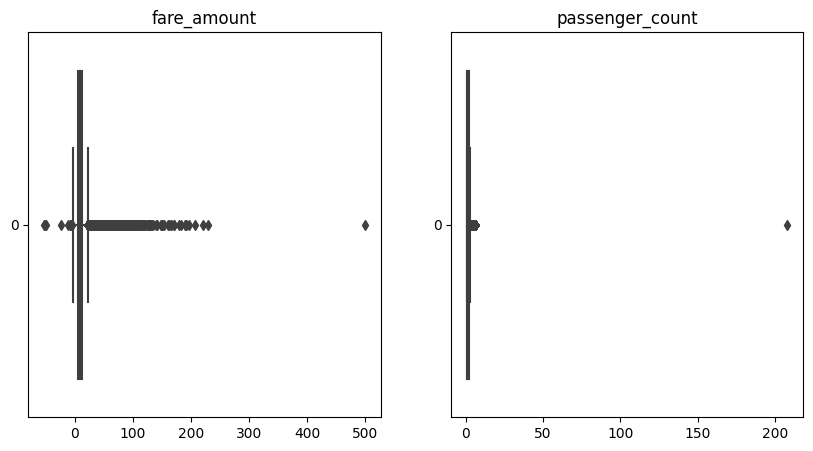

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=df1['fare_amount'],orient='h', ax=axs[0]).set(title='fare_amount')
sns.boxplot(data=df1['passenger_count'], orient='h', ax=axs[1]).set(title='passenger_count')
plt.show()

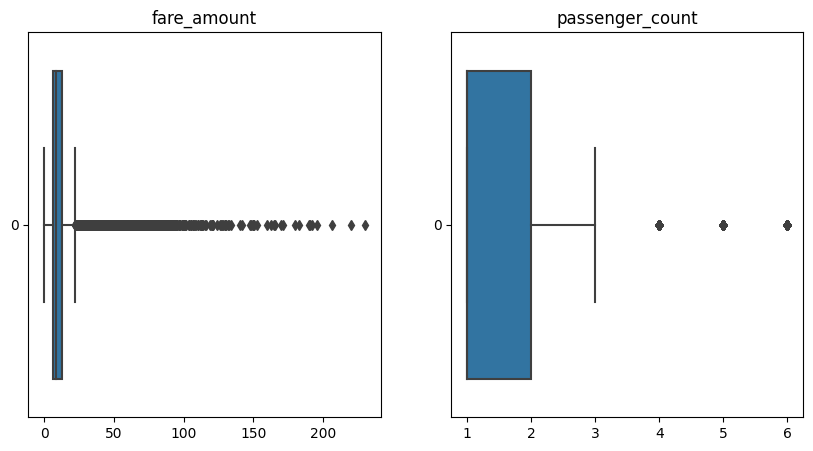

In [32]:
df1=df1[(df1['fare_amount']<400) & (df1['fare_amount']>0)]
df1=df1[df1['passenger_count']<150]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=df1['fare_amount'],orient='h', ax=axs[0]).set(title='fare_amount')
sns.boxplot(data=df1['passenger_count'], orient='h', ax=axs[1]).set(title='passenger_count')
plt.show()

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

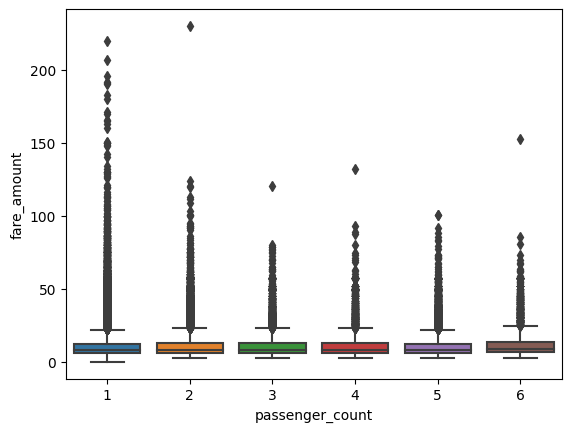

In [33]:
sns.boxplot(data=df1, x='passenger_count', y='fare_amount')


<Axes: xlabel='passenger_count', ylabel='fare_amount'>

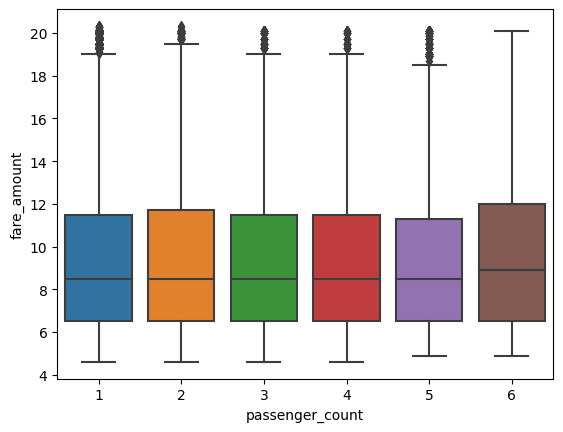

In [34]:
#df2=df1
percentiles = df1['fare_amount'].quantile([0.1, 0.9]).values
df1=df1[(df1['fare_amount'] > percentiles[0]) & (df1['fare_amount'] < percentiles[1])]
sns.boxplot(data=df1, x='passenger_count', y='fare_amount')

In [35]:
df1.groupby('passenger_count')['fare_amount'].describe()


,count,mean,std,min,25%,50%,75%,max
passenger_count,,,,,,,,
1,106140.0,9.373180,3.667459,4.6,6.5,8.5,11.5,20.33
2,22669.0,9.480546,3.679590,4.6,6.5,8.5,11.7,20.33
3,6970.0,9.407070,3.634535,4.6,6.5,8.5,11.5,20.10
4,3363.0,9.432545,3.662804,4.6,6.5,8.5,11.5,20.10
5,10771.0,9.345289,3.633145,4.9,6.5,8.5,11.3,20.10
6,3362.0,9.722228,3.769981,4.9,6.5,8.9,12.0,20.10


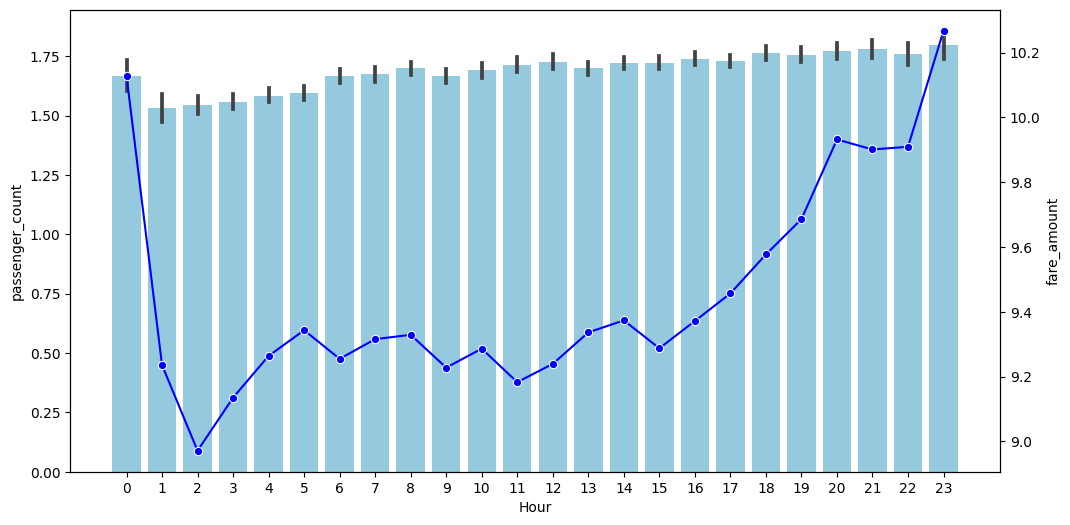

In [36]:
fig, ax1=plt.subplots(figsize=(12,6))
sns.color_palette("pastel")
sns.barplot(data=df1,x='Hour', y='passenger_count', color='skyblue', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=df1,x='Hour', y='fare_amount', errorbar=None, color='blue', marker='o', ax=ax2)
plt.show()

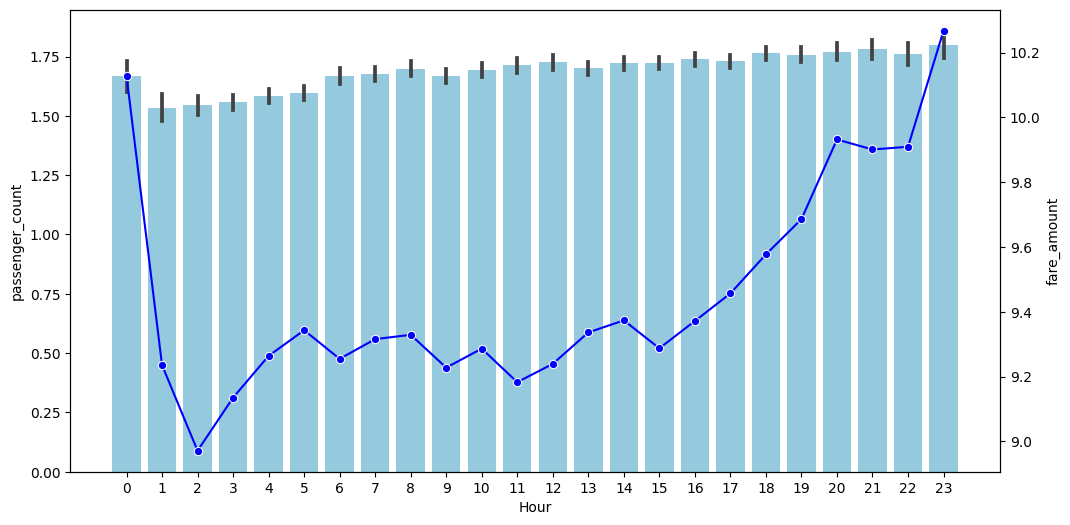

In [37]:
fig, ax1=plt.subplots(figsize=(12,6))
sns.color_palette("pastel")
sns.barplot(data=df1,x='Hour', y='passenger_count', color='skyblue', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=df1,x='Hour', y='fare_amount', errorbar=None, color='blue', marker='o', ax=ax2)
plt.show()

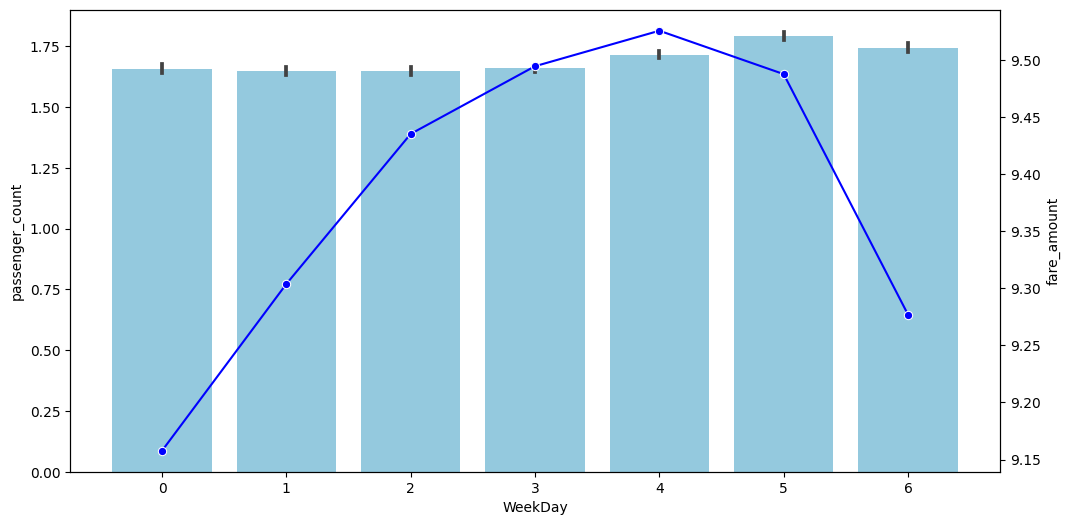

In [38]:
fig, ax1=plt.subplots(figsize=(12,6))
sns.color_palette("pastel")
sns.barplot(data=df1,x='WeekDay', y='passenger_count', color='skyblue', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=df1,x='WeekDay', y='fare_amount', errorbar=None, color='blue', marker='o', ax=ax2)
plt.show()

<Axes: xlabel='Year', ylabel='fare_amount'>

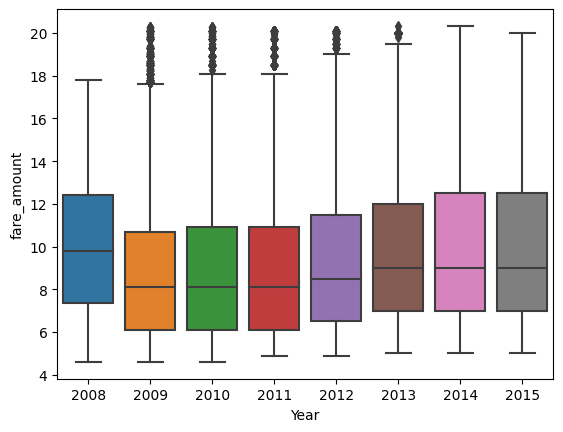

In [39]:
sns.boxplot(data=df1, x='Year', y='fare_amount')
